In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Bureau_Balance

- Monthly blances of previous credits in Credit Bureau
- This table has one row for each month of history of every previous credit reported to Credit Bureau i.e the table has (#loans in sample # of relative previous credits # months where we have some history observable for the previous credits) rows 

In [3]:
bureau_balance = pd.read_csv('bureau_balance.csv')
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [4]:
bureau_balance.shape

(27299925, 3)

In [8]:
bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [9]:
bureau_balance.duplicated().sum()

0

In [10]:
bureau_balance.nunique()

SK_ID_BUREAU      817395
MONTHS_BALANCE        97
STATUS                 8
dtype: int64

In [5]:
bureau_balance.columns

Index(['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS'], dtype='object')

In [11]:
def missing_value(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum() / df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat ([total, percent], axis = 1, keys = ['Total', 'Percent'])

In [12]:
missing_value(bureau_balance)

,Total,Percent
SK_ID_BUREAU,0,0.0
MONTHS_BALANCE,0,0.0
STATUS,0,0.0


In [6]:
bureau_balance['STATUS'].value_counts()

C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: STATUS, dtype: int64

### STATUS

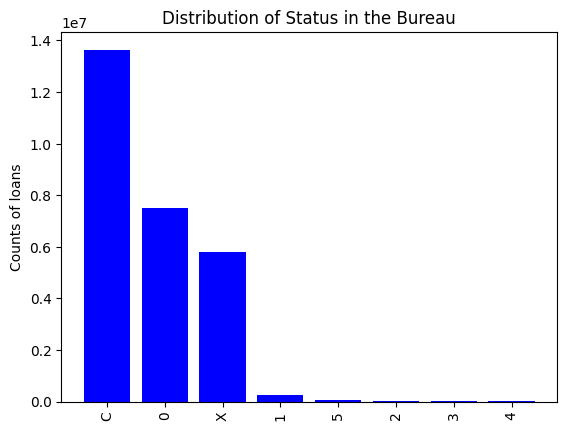

In [7]:
status_dict = dict(bureau_balance['STATUS'].value_counts())
status_dict

sorted_status_dict = dict(sorted(status_dict.items(), key = lambda kv :kv[1],reverse = True))
ind_2 = np.arange(len(sorted_status_dict))

p1 = plt.bar(ind_2, list(sorted_status_dict.values()), color = 'blue')

plt.ylabel('Counts of loans')
plt.title('Distribution of Status in the Bureau')
plt.xticks(ind_2, list(sorted_status_dict.keys()), rotation = 90)
plt.show()

#### Comment:
- Most of the loans are closed in the Credit Bureau, which is followed by clients with 0 DPD and then by applicants whose status is unknown
- We can conclide that there are very few annuity defaulters in the data

<Figure size 1300x800 with 0 Axes>

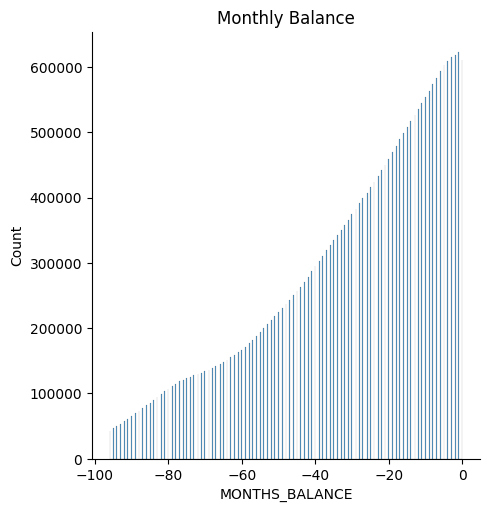

In [16]:
plt.figure(figsize = (13,8))
ax = sns.displot(bureau_balance['MONTHS_BALANCE'])
plt.title('Monthly Balance')
plt.show()
